In [1]:
import os
import glob
import cv2 as cv
from matplotlib import pyplot as plt
import random

**Constance**

In [2]:
CWD = os.getcwd()
PROJECT_NAME = 'omdena-template'
HEALTHY = "NORMAL"
SICK = "PNEUMONIA"
DIM = (224,224)

## Get Directories Path

In [3]:
if CWD.split('/')[-1] != PROJECT_NAME:
    base_path = os.path.join(CWD.split(PROJECT_NAME)[0],PROJECT_NAME)
else:
    base_path = CWD
    
RAW_TRAIN_PATH = os.path.join(base_path,'task-1-data-labeling/data/labeled-data/train')
RAW_TEST_PATH = os.path.join(base_path,'task-1-data-labeling/data/labeled-data/test')
RAW_VAL_PATH = os.path.join(base_path,'task-1-data-labeling/data/labeled-data/val')

In [4]:
RAW_TRAIN_PNEUMONIA_FILE_LIST = glob.glob(os.path.join(RAW_TRAIN_PATH,"PNEUMONIA/*"))
RAW_TRAIN_NORMAL_FILE_LIST = glob.glob(os.path.join(RAW_TRAIN_PATH,"NORMAL/*"))

RAW_TEST_PNEUMONIA_FILE_LIST = glob.glob(os.path.join(RAW_TEST_PATH,"PNEUMONIA/*"))
RAW_TEST_NORMAL_FILE_LIST = glob.glob(os.path.join(RAW_TEST_PATH,"NORMAL/*"))

RAW_VAL_PNEUMONIA_FILE_LIST = glob.glob(os.path.join(RAW_VAL_PATH,"PNEUMONIA/*"))
RAW_VAL_NORMAL_FILE_LIST = glob.glob(os.path.join(RAW_VAL_PATH,"NORMAL/*"))

In [5]:
print(f"RAW_TRAIN_PNEUMONIA_FILE_LIST: {len(RAW_TRAIN_PNEUMONIA_FILE_LIST)}\n"
      f"RAW_TRAIN_NORMAL_FILE_LIST: {len(RAW_TRAIN_NORMAL_FILE_LIST)}\n"
      f"RAW_TEST_PNEUMONIA_FILE_LIST: {len(RAW_TEST_PNEUMONIA_FILE_LIST)}\n"
      f"RAW_TEST_NORMAL_FILE_LIST: {len(RAW_TEST_NORMAL_FILE_LIST)}\n"
      f"RAW_VAL_PNEUMONIA_FILE_LIST: {len(RAW_VAL_PNEUMONIA_FILE_LIST)}\n"
      f"RAW_VAL_NORMAL_FILE_LIST: {len(RAW_VAL_NORMAL_FILE_LIST)}")

RAW_TRAIN_PNEUMONIA_FILE_LIST: 420
RAW_TRAIN_NORMAL_FILE_LIST: 378
RAW_TEST_PNEUMONIA_FILE_LIST: 210
RAW_TEST_NORMAL_FILE_LIST: 156
RAW_VAL_PNEUMONIA_FILE_LIST: 8
RAW_VAL_NORMAL_FILE_LIST: 8


### Load & Process the Data

#### Load & Resize

In [10]:
print("Loading RAW_TRAIN..")
RAW_TRAIN_PNEUMONIA= [cv.resize(cv.imread(path,0), DIM) for path in RAW_TRAIN_PNEUMONIA_FILE_LIST]
RAW_TRAIN_NORMAL= [cv.resize(cv.imread(path,0), DIM) for path in RAW_TRAIN_NORMAL_FILE_LIST]

print("Loading RAW_TEST..")
RAW_TEST_PNEUMONIA= [cv.resize(cv.imread(path,0), DIM) for path in RAW_TEST_PNEUMONIA_FILE_LIST]
RAW_TEST_NORMAL= [cv.resize(cv.imread(path,0), DIM) for path in RAW_TEST_NORMAL_FILE_LIST]

print("Loading RAW_VAL..")
RAW_VAL_PNEUMONIA= [cv.resize(cv.imread(path,0), DIM) for path in RAW_VAL_PNEUMONIA_FILE_LIST]
RAW_VAL_NORMAL= [cv.resize(cv.imread(path,0), DIM) for path in RAW_VAL_NORMAL_FILE_LIST]

Loading RAW_TRAIN..
Loading RAW_TEST..
Loading RAW_VAL..


#### Adaptive Threshold

In [7]:
adp_tsh = cv.adaptiveThreshold
adp_tsh_mn = cv.ADAPTIVE_THRESH_MEAN_C
th_bin = cv.THRESH_BINARY

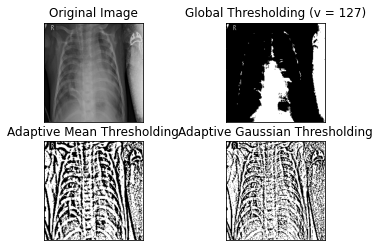

In [14]:
# img = cv.imread(RAW_TRAIN_PNEUMONIA_FILE_LIST[1],0)

img = RAW_TRAIN_PNEUMONIA[0]

# img = cv.medianBlur(img,5)

_ ,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)

th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

In [15]:
print("Loading RAW_TRAIN..")
RAW_TRAIN_PNEUMONIA= [adp_tsh(img,255,adp_tsh_mn,th_bin,11,2) for img in RAW_TRAIN_PNEUMONIA]
RAW_TRAIN_NORMAL= [adp_tsh(img,255,adp_tsh_mn,th_bin,11,2) for img in RAW_TRAIN_NORMAL]

print("Loading RAW_TEST..")
RAW_TEST_PNEUMONIA= [adp_tsh(img,255,adp_tsh_mn,th_bin,11,2) for img in RAW_TEST_PNEUMONIA]
RAW_TEST_NORMAL= [adp_tsh(img,255,adp_tsh_mn,th_bin,11,2) for img in RAW_TEST_NORMAL]

print("Loading RAW_VAL..")
RAW_VAL_PNEUMONIA= [adp_tsh(img,255,adp_tsh_mn,th_bin,11,2) for img in RAW_VAL_PNEUMONIA]
RAW_VAL_NORMAL= [adp_tsh(img,255,adp_tsh_mn,th_bin,11,2) for img in RAW_VAL_NORMAL]

Loading RAW_TRAIN..
Loading RAW_TEST..
Loading RAW_VAL..


### Save the Data to File

In [16]:
from pathlib import Path
BASE_PROC_DIR = os.path.join(base_path,"task-2-data-processing/data/processed-data")
Path(BASE_PROC_DIR).mkdir(parents=True, exist_ok=True)

In [17]:
"""
1) Creates base directory with path ../../../task-2-data-processing/data/processed-data/*/**/
    where:
     * [train/test/val]
     ** [NORMAL/PNEUMONIA]
2) Save processed images to file with their original name.
"""

for IMG_LIST,IMG_PATH_LIST in zip([RAW_TRAIN_PNEUMONIA, RAW_TRAIN_NORMAL, RAW_TEST_PNEUMONIA,
                                 RAW_TEST_NORMAL, RAW_VAL_PNEUMONIA, RAW_VAL_NORMAL],
                                [RAW_TRAIN_PNEUMONIA_FILE_LIST, RAW_TRAIN_NORMAL_FILE_LIST,
                                 RAW_TEST_PNEUMONIA_FILE_LIST, RAW_TEST_NORMAL_FILE_LIST,
                                 RAW_VAL_PNEUMONIA_FILE_LIST, RAW_VAL_NORMAL_FILE_LIST]
                                ):
    # (1)
    base_path_list = [BASE_PROC_DIR] + IMG_PATH_LIST[0].split('/')[-3:-1]
    Path(os.path.join(*base_path_list)).mkdir(parents=True, exist_ok=True)
    for img,path in zip(IMG_LIST,IMG_PATH_LIST):
        # (2)
        file_path_list = base_path_list + [path.split('/')[-1]]
        cv.imwrite(os.path.join(*file_path_list), img)